RATING PREDICTION

In [59]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [60]:
#Reading excel file and converting it in dataframe:
ds=pd.read_excel("reviews_data.xlsx")
df=pd.DataFrame(ds)
df.head()

,Unnamed: 0,Rating,Review
0,6365,5,It's really nice product worth to buy and I'm ...
1,2455,5,Very nice
2,14681,5,good
3,2443,5,Nice product and very comfortable 👌
4,2445,5,"Very lightweight , thin , classic product."


In [61]:
# shape of dataset:
df.shape

(42405, 3)

42405 rows and 3  columns

In [63]:
# datatypes
df.dtypes

Unnamed: 0     int64
Rating         int64
Review        object
dtype: object

2 int and 1 object type

In [64]:
# datatset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42405 entries, 0 to 42404
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42405 non-null  int64 
 1   Rating      42405 non-null  int64 
 2   Review      42376 non-null  object
dtypes: int64(2), object(1)
memory usage: 994.0+ KB


NAN values presnt in Review column

In [3]:
#checking rows containing nan values:
df[df['Review'].isna()]

,Unnamed: 0,Rating,Review
17821,9914,3,NaN
18854,12076,3,NaN
21351,22974,3,NaN
21366,2160,3,NaN
22793,963,3,NaN
25221,19616,3,NaN
26201,16127,2,NaN
26260,10175,2,NaN
29810,22979,2,NaN
31390,27904,2,NaN


In [5]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

5    8481
4    8481
3    8481
2    8481
1    8481
Name: Rating, dtype: int64


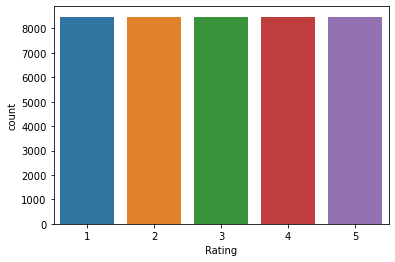

In [6]:
# Plotting Target Lable: Rating 

ax=sns.countplot(x="Rating", data=df)
print(df["Rating"].value_counts())

Balanced class as all the value are equal

In [7]:
# Removing Nan Values:

def preprocessore_inputs(data):
    data=data.copy()
    missing_reviews=data[data['Review'].isna()].index
    data=data.drop(missing_reviews, axis=0).reset_index(drop=True)
    return data
df1=preprocessore_inputs(df)
print(df1)

       Unnamed: 0  Rating                                             Review
0            6365       5  It's really nice product worth to buy and I'm ...
1            2455       5                                          Very nice
2           14681       5                                               good
3            2443       5                Nice product and very comfortable 👌
4            2445       5         Very lightweight , thin , classic product.
...           ...     ...                                                ...
42371       53823       1                                        Third grade
42372       53824       1                                          Not Happy
42373       53825       1                                   Bat quality.....
42374         926       1  cartridges are very low. After printing 10-15 ...
42375       53855       1  This such a bad printer. Stopped working after...

[42376 rows x 3 columns]


In [8]:
df1.shape

(42376, 3)

In [9]:
df1.drop(["Unnamed: 0"], axis = 1, inplace = True)
df1

,Rating,Review
0,5,It's really nice product worth to buy and I'm ...
1,5,Very nice
2,5,good
3,5,Nice product and very comfortable 👌
4,5,"Very lightweight , thin , classic product."
...,...,...
42371,1,Third grade
42372,1,Not Happy
42373,1,Bat quality.....
42374,1,cartridges are very low. After printing 10-15 ...


In [10]:
import re
import nltk
import string

In [11]:
# Pre processing Review column:

def get_clean(x):
    x=str(x).lower().replace('\\','').replace('_',' ')
    x=re.sub('\[.*?\]','',x)
    x=re.sub('[%s]'%re.escape(string.punctuation),'',x)
    x=re.sub('\w*\d\w*','',x)
    x=re.sub("(.)\\1{2,}","\\1",x)
    return x


In [12]:
df1['Review']=df1['Review'].apply(lambda x: get_clean(x))

In [13]:
df1

,Rating,Review
0,5,its really nice product worth to buy and im ha...
1,5,very nice
2,5,good
3,5,nice product and very comfortable 👌
4,5,very lightweight thin classic product
...,...,...
42371,1,third grade
42372,1,not happy
42373,1,bat quality
42374,1,cartridges are very low after printing pages ...


In [14]:
# Checking Unique values of Dataset:

column_name =df1.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df1[column].unique()))

Rating: [5 4 3 2 1]
Review: ['its really nice product worth to buy and im happy with the product'
 'very nice' 'good' ...
 'totally waste of money plz never buy this product i had purchased on feb and now it not working totally waste'
 'stop working within '
 'cartridges are very low after printing  pages printer shows low ink message']


In [15]:
# Removing Emojis:

import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [16]:
df1['Review']=df1['Review'].apply(lambda x: remove_emoji(x))

In [17]:
df1.head(60)

,Rating,Review
0,5,its really nice product worth to buy and im ha...
1,5,very nice
2,5,good
3,5,nice product and very comfortable
4,5,very lightweight thin classic product
5,5,display quality
6,5,this phone is one of the best phones which act...
7,5,phone comes with a back cover so no need to bu...
8,5,good mobile everything is good\nbut camera out...
9,5,a good and clean user experience\nis slightly ...


# Model Selection:

In [18]:
#importing libraries for model selection

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [19]:
# tfidf vectorizer is initialised
tfidf=TfidfVectorizer(ngram_range=(1,3),analyzer='char')

In [20]:
x=tfidf.fit_transform(df1['Review'])
y = df1["Rating"]

In [23]:
x.shape

(42376, 10409)

In [24]:
y.shape

(42376,)

In [21]:
#train_test_split method

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
train_x.shape

(33900, 10409)

In [23]:
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [24]:
#finding cv value:

pred_lr=lr.predict(test_x)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(test_y,pred_lr)

for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-", lsc*100)
    print("Accuracy score is:-", lss*100)

At cv:- 2
Cross validation score is:- 65.4568623749292
Accuracy score is:- 72.66399244926852
At cv:- 3
Cross validation score is:- 70.32287833435032
Accuracy score is:- 72.66399244926852
At cv:- 4
Cross validation score is:- 71.03549178780442
Accuracy score is:- 72.66399244926852
At cv:- 5
Cross validation score is:- 71.8732922108024
Accuracy score is:- 72.66399244926852
At cv:- 6
Cross validation score is:- 72.00545991659615
Accuracy score is:- 72.66399244926852
At cv:- 7
Cross validation score is:- 72.1871872320249
Accuracy score is:- 72.66399244926852
At cv:- 8
Cross validation score is:- 72.23192373041346
Accuracy score is:- 72.66399244926852
At cv:- 9
Cross validation score is:- 72.345410870764
Accuracy score is:- 72.66399244926852


In [25]:
pred_test=lr.predict(test_x)

In [26]:
#printing classification report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           1       0.77      0.78      0.77      1685
           2       0.69      0.61      0.65      1674
           3       0.66      0.59      0.63      1666
           4       0.67      0.81      0.74      1706
           5       0.82      0.84      0.83      1745

    accuracy                           0.73      8476
   macro avg       0.73      0.73      0.72      8476
weighted avg       0.73      0.73      0.72      8476



In [27]:
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
alphav= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid= GridSearchCV(estimator=model,param_grid=alphav)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.7373341874737721
0.1
{'alpha': 0.1}


In [30]:
#Using best parameters in Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print('lr score:',lr.score(train_x,train_y))
rd=Ridge(alpha=0.1)
rd.fit(train_x,train_y)
print('Score:', rd.score(train_x,train_y))
print(rd.coef_)
print('Score:', rd.score(train_x,train_y))

lr score: 0.7538643067846608
Score: 0.8005796214622514
[ 1.27355216  0.31450984  0.44302346 ...  0.26793479 -0.27292584
 -0.27292584]
Score: 0.8005796214622514


In [31]:
#printing classification report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           1       0.77      0.78      0.77      1685
           2       0.69      0.61      0.65      1674
           3       0.66      0.59      0.63      1666
           4       0.67      0.81      0.74      1706
           5       0.82      0.84      0.83      1745

    accuracy                           0.73      8476
   macro avg       0.73      0.73      0.72      8476
weighted avg       0.73      0.73      0.72      8476



## DecisionTreeClassifier

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
grid_param={'criterion': ['entropy', 'gini'],
              'splitter':['best','random']
           }
gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',verbose = 2,
                  cv=9)
gd_sr.fit(train_x,train_y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

Fitting 9 folds for each of 4 candidates, totalling 36 fits
[CV] END ...................criterion=entropy, splitter=best; total time=  28.2s
[CV] END ...................criterion=entropy, splitter=best; total time=  27.8s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.3s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.6s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.3s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.0s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.2s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.0s
[CV] END ...................criterion=entropy, splitter=best; total time=  28.9s
[CV] END .................criterion=entropy, splitter=random; total time=  25.5s
[CV] END .................criterion=entropy, splitter=random; total time=  25.9s
[CV] END .................criterion=entropy, spli

In [33]:
#using best parameters for decision tree classifier
dtc= DecisionTreeClassifier(criterion='entropy',splitter='random')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)

0.9248967551622419

In [34]:
#finding cross validation score

dtscore = cross_val_score(dtc,x,y,cv=9)
dts = dtscore.mean()
print('Cross Val Score:',dts*100)

Cross Val Score: 79.10871916702867


In [35]:
#Predicted value
pred = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion= confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7940066068900424
Confusion Matrix:  [[1352  154  114   47   18]
 [ 191 1138  244   59   42]
 [ 137  243 1091  153   42]
 [   5   13   29 1600   59]
 [   1    3   13  179 1549]]


In [56]:
#printing classification report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80      1685
           2       0.73      0.68      0.71      1674
           3       0.73      0.65      0.69      1666
           4       0.79      0.94      0.85      1706
           5       0.91      0.89      0.90      1745

    accuracy                           0.79      8476
   macro avg       0.79      0.79      0.79      8476
weighted avg       0.79      0.79      0.79      8476



## RandomForestClassifier 

In [36]:
#Using GridsearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

forest_params = [{'max_depth': [5, 10, None]}]

clf = GridSearchCV(rfc, forest_params,scoring='f1_weighted',cv =9, n_jobs = -1, verbose = 3,refit = False)

clf.fit(train_x,train_y)
    
print(clf.best_params_)

Fitting 9 folds for each of 3 candidates, totalling 27 fits
{'max_depth': None}


In [37]:
#using best parameters:
rfc= RandomForestClassifier(max_depth=None)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)

0.9248967551622419

In [38]:
#finding cross val score

rfscore = cross_val_score(rfc,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score: 81.33879214842692


In [39]:
#Predicting value
pred_rfc = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred_rfc)
confusion=confusion_matrix(test_y,pred_rfc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.8219679093912223
Confusion Matrix:  [[1537   68   40   32    8]
 [ 234 1070  297   44   29]
 [ 137  157 1210  137   25]
 [   6    5   37 1601   57]
 [   2    0   16  178 1549]]


In [57]:
#printing classification report
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

           1       0.80      0.91      0.85      1685
           2       0.82      0.64      0.72      1674
           3       0.76      0.73      0.74      1666
           4       0.80      0.94      0.87      1706
           5       0.93      0.89      0.91      1745

    accuracy                           0.82      8476
   macro avg       0.82      0.82      0.82      8476
weighted avg       0.82      0.82      0.82      8476



## KNeighborsClassifier

In [42]:
#Using GridsearchCV on KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

knc=KNeighborsClassifier()

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }

clf = GridSearchCV(knc, parameters, cv=9, scoring='accuracy',verbose=2)

clf.fit(train_x,train_y)
    
print(clf.best_params_)

Fitting 9 folds for each of 80 candidates, totalling 720 fits
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  13.4s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.9s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.3s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.5s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.3s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=   9.9s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.0s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  10.0s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=   9.9s
[CV] END ....algorithm=auto, n_neighbors=0, weights=distance; total time=  10.4s
[CV] END ....algorithm=auto, n_neighbors=0, weights=distance; total time=  10.2s
[CV] END ....algorithm=auto, n_neighbors=0, wei

[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   9.2s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=   9.3s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  10.0s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  10.0s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  10.3s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  10.3s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  10.9s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  10.6s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  10.7s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  10.8s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  10.4s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  10.2s
[CV] END .....algorithm=auto

[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=   9.9s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=   9.2s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.3s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.4s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.3s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.3s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=   9.2s
[CV] END algorithm=b

[CV] END algorithm=ball_tree, n_neighbors=6, weights=distance; total time=  10.6s
[CV] END algorithm=ball_tree, n_neighbors=6, weights=distance; total time=  10.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.0s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.5s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.5s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  10.5s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=distance; total time=  10.2s
[CV] END algorithm=ball_t

[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.6s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.6s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.7s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.6s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.6s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.4s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.6s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.4s
[CV] END .algorithm=kd_tree, n_neighbors=2, weights=distance; total time=   9.4s
[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   9.7s
[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   9.9s
[CV] END ..algorithm=kd_tree, n_neighbors=3, weights=uniform; total time=   9.6s
[CV] END ..algorithm=kd_tree

[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.5s
[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.5s
[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.6s
[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.5s
[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.3s
[CV] END ..algorithm=kd_tree, n_neighbors=8, weights=uniform; total time=  10.6s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=  10.3s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=  10.3s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=  10.4s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=  10.3s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=   9.9s
[CV] END .algorithm=kd_tree, n_neighbors=8, weights=distance; total time=  10.0s
[CV] END .algorithm=kd_tree,

[CV] END ...algorithm=brute, n_neighbors=3, weights=distance; total time=   9.3s
[CV] END ...algorithm=brute, n_neighbors=3, weights=distance; total time=   9.5s
[CV] END ...algorithm=brute, n_neighbors=3, weights=distance; total time=   9.2s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   9.7s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.0s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.1s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   9.9s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.0s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.3s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.1s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=   9.8s
[CV] END ....algorithm=brute, n_neighbors=4, weights=uniform; total time=  10.0s
[CV] END ...algorithm=brute,

[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.0s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.3s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.0s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.0s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.8s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.6s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.2s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.1s
[CV] END ...algorithm=brute, n_neighbors=9, weights=distance; total time=  10.3s
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [43]:
#using best parameters on KNeighborsClassifier
knc= KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knc.fit(train_x,train_y)
knc.score(train_x,train_y)

0.9143952802359882

In [44]:
#Predicting value
pred_knc = knc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred_knc)
confusion=confusion_matrix(test_y,pred_knc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7889334591788579
Confusion Matrix:  [[1361  199   43   64   18]
 [ 188 1179  208   46   53]
 [ 111  279 1087  101   88]
 [   8   15   44 1448  191]
 [   3    3   22  105 1612]]


In [46]:
#finding cross val score

knscore = cross_val_score(knc,x,y,cv=9)
kns = knscore.mean()
print('Cross Val Score:',kns*100)

Cross Val Score: 78.66740452155535


In [58]:
#printing classification report
print(classification_report(test_y,pred_knc))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81      1685
           2       0.70      0.70      0.70      1674
           3       0.77      0.65      0.71      1666
           4       0.82      0.85      0.83      1706
           5       0.82      0.92      0.87      1745

    accuracy                           0.79      8476
   macro avg       0.79      0.79      0.79      8476
weighted avg       0.79      0.79      0.79      8476



## SVClassifier

In [53]:
#Using GridsearchCV on SVClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf']}
svc=svm.SVC()
clf= GridSearchCV(svc,parameters, cv=9, scoring='accuracy',verbose=2)
clf.fit(train_x,train_y)
print(clf.best_params_)

Fitting 9 folds for each of 2 candidates, totalling 18 fits
[CV] END ......................................kernel=linear; total time= 9.6min
[CV] END ......................................kernel=linear; total time= 9.8min


KeyboardInterrupt: 

In [55]:
#using best parameters in SVClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
sv=svm.SVC(kernel='rbf')
sv.fit(train_x,train_y)
sv.score(train_x,train_y)

KeyboardInterrupt: 

In [ ]:
#Predicting value
predsv = sv.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,predsv)
confusion=confusion_matrix(test_y,predsv)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

In [ ]:
#finding cross val score
svscore = cross_val_score(sv,x,y,cv=9)
svs = svscore.mean()
print('Cross Val Score:',svs*100)

The best Model is Random Forest Classifier as it has Accuracy score of 82.1% and also has Cross validation score of 81.3%. The classification report also shows higher precision, recall value and f1 score in Random Forest Classifier.

# Model saving

In [50]:
#saving the model

import pickle
filename = 'Reviews.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [51]:
#finding Accuracy of the model

loaded_model = pickle.load(open('Reviews.pkl', 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8219679093912223


In [52]:
import numpy as np
a=np.array(test_y)
pred_rfc =np.array(rfc.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred_rfc},index=range(len(a)))
df_com

,original,predicted
0,2,2
1,3,3
2,2,2
3,4,4
4,4,4
...,...,...
8471,2,2
8472,3,2
8473,5,5
8474,1,1


Model is able to predict approximately equal to actual values.